# PyTorch TensorBoard Support

## Before You Start

In [2]:
conda install pytorch torchvision -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/1001l1000/opt/anaconda3/envs/J

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-python-1.0.9        |   py38he9d5cce_7         353 KB
    ca-certificates-2023.12.12 |       hecd8cb5_0         127 KB
    certifi-2023.11.17         |   py38hecd8cb5_0         159 KB
    cffi-1.15.1                |   py38hc55c11b_0         220 KB
    cryptography-41.0.3        |   py38ha2381d6_0 

In [4]:
conda update -n J -c defaults conda


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/1001l1000/opt/anaconda3/envs/J
  package name: conda



Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install matplotlib tensorboard

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::python==3.8.13=hdfd78df_1
  - defaults/osx-64::setuptools==68.0.0=py38hecd8cb5_0
  - defaults/osx-64::pip==23.2.1=py38hecd8cb5_0
  - defaults/osx-64::wheel==0.38.4=py38hecd8cb5_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/1001l1000/opt/anaconda3/envs/J

  added / updated specs:
    - matplotlib
    - tensorboard


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20211102.0      |       he9d5cce_0         933 KB
    absl-py-1.4.0              |   py38hecd8cb5_0         185 KB
    aiohttp-3.9.0              |   py38

## Introduction 

In [3]:
!pip install chardet

  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 3.3 MB/s eta 0:00:0000:01


In [1]:
# PyTorch model and training necessities
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Image datasets and image manipulation
import torchvision
import torchvision.transforms as transforms

# Image display
import matplotlib.pyplot as plt
import numpy as np

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter

2023-12-22 17:15:27.912925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Parameter 제외하고, 이 비디오에서 논의하는 클래스는 모두 torch.nn.Module 하위 클래스이다. <br>
이것은 PyTorch 모델과 그 구성 요소와 관련된 동작을 캡슐화하기 위한 PyTorch 기본 클래스이다.

In [3]:
# 두 개의 선형 레이어와 활성화 기능이 있는 매우 간단한 모델
# 인스턴스를 만들고 매개 변수에 대해 보고하도록 요청한다. 
import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model :')
print(tinymodel)

print('\n\nJust one layer :')
print(tinymodel.linear2)

print('\n\nModel params :')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params :')
for param in tinymodel.linear2.parameters():
    print(param)

The model :
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer :
Linear(in_features=200, out_features=10, bias=True)


Model params :
Parameter containing:
tensor([[-0.0367, -0.0990, -0.0237,  ..., -0.0031, -0.0729, -0.0021],
        [ 0.0030, -0.0538, -0.0509,  ...,  0.0736,  0.0348, -0.0114],
        [ 0.0410,  0.0819,  0.0173,  ..., -0.0781,  0.0242,  0.0531],
        ...,
        [-0.0802,  0.0588, -0.0418,  ..., -0.0786, -0.0134, -0.0169],
        [ 0.0185,  0.0231,  0.0232,  ..., -0.0288,  0.0106, -0.0329],
        [ 0.0707, -0.0748, -0.0110,  ...,  0.0512, -0.0454, -0.0619]],
       requires_grad=True)
Parameter containing:
tensor([-6.5112e-02, -1.6517e-02, -5.0165e-02,  6.1669e-02,  7.0328e-02,
        -3.7322e-02,  4.4338e-02,  2.7842e-02,  5.9989e-02,  4.4850e-02,
        -3.6708e-02, -2.3123e-02,  3.1004e-02,  8.3

## Showing Images in TensorBoard

100%|██████████████████████████| 26421880/26421880 [00:13<00:00, 1960344.63it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████| 29515/29515 [00:00<00:00, 96021.22it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:02<00:00, 1655135.62it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 6474445.87it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



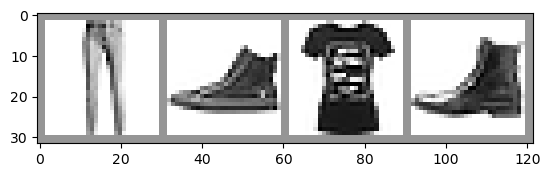

In [4]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download = True,
    train = True,
    transform = transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download = True,
    train = False,
    transform = transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size = 4,
                                              shuffle = True,
                                              num_workers = 2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size = 4,
                                                shuffle = False,
                                                num_workers = 2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel = False):
    if one_channel:
        img = img.mean(dim = 0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel = True)

In [5]:
# Default log_dir argument is "runs" - but it's good to be specific
# torch.utils.tensorboard.SummaryWriter is imported above
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

# To view, start TensorBoard on the command line with:
#   tensorboard --logdir=runs
# ...and open a browser tab to http://localhost:6006/

## Graphing Scalars to Visualize Training

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [7]:
print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            net.train(False) # Don't need to track gradents for validation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Turn gradients back on for training

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


## Visualizing Your Model

In [8]:
# Again, grab a single mini-batch of images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(net, images)
writer.flush()

## Visualizing Your Dataset with Embeddings

In [9]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n = 100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata = class_labels,
                    label_img = images.unsqueeze(1))
writer.flush()
writer.close()